<a href="https://colab.research.google.com/github/AnnaVithoriaMS/BlogLiterario/blob/main/relatorio_diamantesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados foram encontrados em:
    https://www.kaggle.com/shivam2503/diamonds

Diamante s√£o pedras preciosas constitu√≠das de carbono, o diamante √© o mineral de maior dureza na escala Mohs, isso significa que um diamante s√≥ pode ser riscado por o utro diamante. S√£o pedra formadas com detererminadas condi√ß√µes de press√£o e temperatura. 



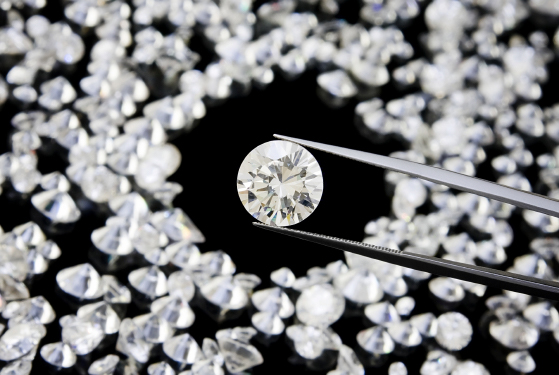

Os diamantes s√£o classificados pelo usando o metodo dos 4C's, isso √© o valor dos diamantes s√£o determinados a partir de quatro criteiros corte (cut ), peso (carat), cor (color) e pureza (clarity).


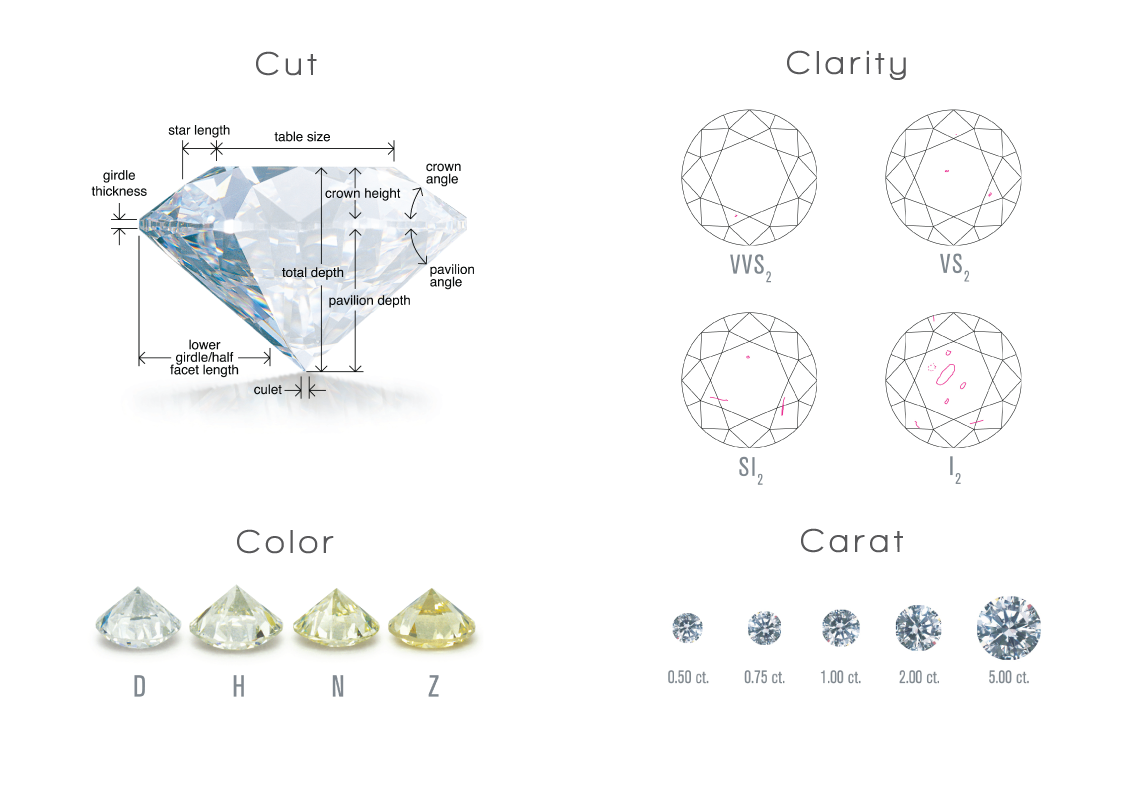

**Objetivos**

Identificar o que  mais afeta o valor dos diamantes e avaliar as observa√ß√µes usando o 4C's. 
*   Como o peso afeta o pre√ßo
*   Como a cor vai afetar o pre√ßo
*   Como o corte afeta o pre√ßo
*   Como o n√≠vel de pureza do diamante pode ser determinate
*   Por que pedras muito parecidas teriam valores diferentes





Biblioteca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from plotnine import *

O conjunto de dados √© composto por 53940 observa√ß√µes , 11 preditores. Os dados apresentam amostras de diamantes e buscam predizer as caracter√≠sticas que mais  interferem no pre√ßo dos diamantes. No conjunto n√£o foram encontrados valores faltantes, sendo 8 atributos num√©ricos e tr√™s categ√≥ricos.

Os preditores s√£o:

1. "Unnamed : 0‚Äù: O √≠ndice que representa da amostra;
2. ‚Äúcarat‚Äù :  O peso do diamante em quilates
3. "cut":   que representa o tipo de corte do diamante, podendo ser  ‚ÄúFair‚Äù, aceit√°vel, a menor classifica√ß√£o,  ‚ÄúGood‚Äù, ‚ÄúVery Good‚Äù, ‚ÄúIdeal‚Äù e ‚ÄúPremium‚Äù, a de maior valor;
4. ‚Äúcolor‚Äù:   Uma escala categoria que vai do maior valor ‚ÄúD‚Äù ao   menor ‚ÄúJ‚Äù;
5. ‚Äúclarity‚Äù: Um grau de pureza da pedra, uma medida que demonstra o quanto o diamante √© claro, em uma escala que vai 
I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (ideal)
6. depth‚Äù: A profundidade relativa da pedra
7. ‚Äútable‚Äù: superf√≠cie plana que voc√™ pode ver quando olha para o diamante de cima
8. ‚Äúprice‚Äù : O pre√ßo do diamante
9. ‚Äúx ‚Äú:  largura em mil√≠metros
10. ‚Äúy‚Äù : comprimento em mil√≠metro     
11.  ‚Äúz‚Äù : altura em mil√≠metros







Visualiza√ß√£o dos dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diamonds.csv')

In [ ]:
df.head()

Unnamed: 0  carat      cut color clarity  ...  table  price     x     y     z
0           1   0.23    Ideal     E     SI2  ...   55.0    326  3.95  3.98  2.43
1           2   0.21  Premium     E     SI1  ...   61.0    326  3.89  3.84  2.31
2           3   0.23     Good     E     VS1  ...   65.0    327  4.05  4.07  2.31
3           4   0.29  Premium     I     VS2  ...   58.0    334  4.20  4.23  2.63
4           5   0.31     Good     J     SI2  ...   58.0    335  4.34  4.35  2.75

[5 rows x 11 columns]

In [ ]:
print("Tamanho: ", df.shape)
print("Nome dos Atributos: ", df.columns)

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

A descris√£o dos valores num√©ricos foi feita calculando a m√©dia, o desvio padr√£o, ou seja, a medida de dispers√£o dos valores em rela√ß√£o a m√©dia, al√©m do contador. H√° tamb√©m os valores de m√°ximo e m√≠nimo para cada um dos preditores. Os quartis o primeiro at√© 25%, o segundo  50% e o terceiro  75% indicam o valor abaixo no qual uma dada porcentagem das observa√ßoes se encontra, assim 25% dos diamantes tem pre√ßo menor que 950 dolares, logo est√£o no primeiro quartil.

In [ ]:
df.describe()


carat         depth  ...             y             z
count  53940.000000  53940.000000  ...  53940.000000  53940.000000
mean       0.797940     61.749405  ...      5.734526      3.538734
std        0.474011      1.432621  ...      1.142135      0.705699
min        0.200000     43.000000  ...      0.000000      0.000000
25%        0.400000     61.000000  ...      4.720000      2.910000
50%        0.700000     61.800000  ...      5.710000      3.530000
75%        1.040000     62.500000  ...      6.540000      4.040000
max        5.010000     79.000000  ...     58.900000     31.800000

[8 rows x 7 columns]

A assimetria permite analisar a distribui√ß√£o dos dados. Assim dados simetricos tem assimetria muito pr√≥xima de 0, por√©m a assimetria pode ser positiva com negativa. Dessa forma uma assimetria positiva significa que o valorda assimetria √© maior que 0 e esta mais concetrado em valores baixo,  que gera a "calda' para a direita. H√° tamb√©m a assimetria negativa, nesse caso o valor assimetrico √© menor que zero e os dados est√£o concentrados em valores mais altos.

Assim √© poss√≠vel afirmar que os valores de depth est√£o concentrados em valores maiores, apesar do coeficiente pr√≥ximo de zero, assim como s√£o proximos de 0 as assimetrias de table e de x, indicando uma certa uniformidade dos dados, o restante apresenta assimetria positiva o que indica os dados estando mais concentrados em valores menores.

In [ ]:
df.skew()

carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

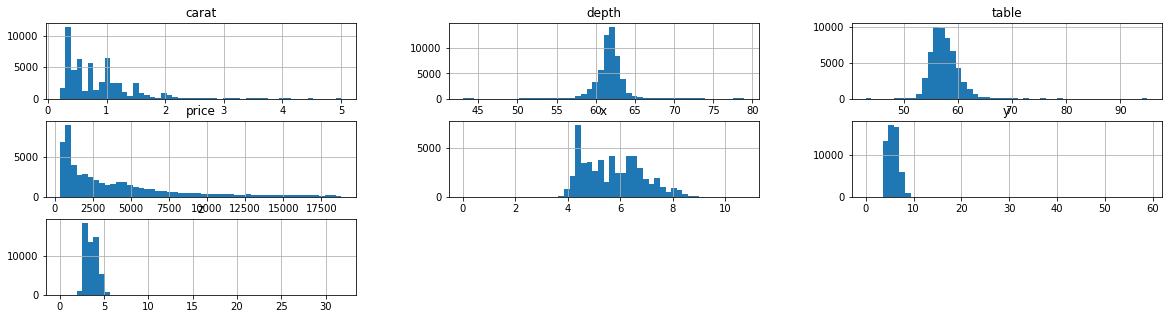

In [ ]:
df.hist(bins=50,figsize=(20,5))
plt.show()

**QUANTITATIVOS**

**CARAT**

O quilate √© uma unidade de medida de peso que representa 200 miligramas, ou 1/5 de uma grama.Um diamante de 1 quilate pesa ent√£o 0,20 gramas.Mas nem sempre o tamanho da pedra aumenta na mesma propor√ß√£o do peso.
qualidade do corte do diamante influencia o tamanho e o peso.
Um diamante pode ser classificado com pontos assim uma pedra que  tenha 50 pontos √© de meio quilate (0,5 ct), ou ainda, dizer que um diamante tem 100 pontos √© o mesmo que falar que ele possui 1 quilate.


A coluna ‚Äúcarat‚Äù tem m√©dia (ùùÅ) 0.798, desvio padr√£o de 0.474 e assimetria 1.1167. Com os dados √© poss√≠vel notar que pelo menos 50% das observa√ß√µes pesa  at√© 0.7 quilates e a maior parte das amostras  n√£o chegar a pesar 2. Al√©m de uma assimetria positiva o que indica que os dados s√£o mais concentrados nos valores menores. 

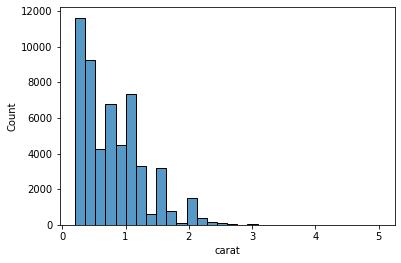

In [ ]:
sns.histplot(data=df, x="carat",bins=30)

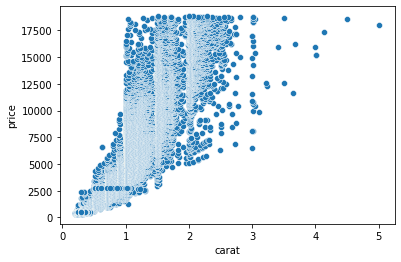

In [ ]:
sns.scatterplot(data=df, x="carat", y="price")

**Depth**

Profundidade de um diamante √© a sua altura medida do culet a mesa. Existe duas classifica√ß√µes de profundidade uma delas em mil√≠metro e a outra uma porcentagem.  
depth = 2 * z / (x + y).
Quando os raios de luz entram em um diamante, a profundidade de um diamante afeta como os raios de luz viajar√£o e ser√£o refletidos dentro dele.
Para criar um retorno de luz e brilho ideais, a porcentagem de profundidade ideal de um diamante dependeria de sua forma e pode variar com base na rela√ß√£o intrincada com outras facetas


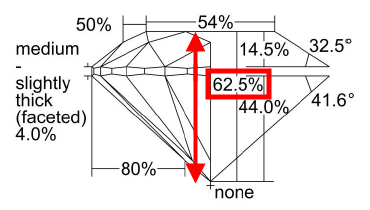

 J√° o atributo ‚Äúdepth‚Äù tem m√©dia  igual a 61.75, o std √© 1.433 e assimetria -0.0823. A assimetria negativa implica que a maioria das amostras est√° concentrada em valores altos. A maioria das amostras est√° concentrada no intervalo de 60% at√© 65% de profundidade.

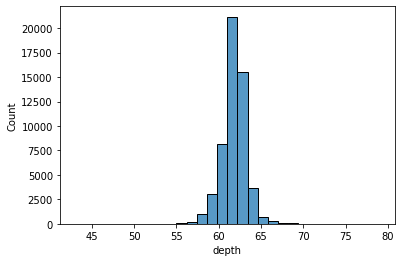

In [ ]:
sns.histplot(data=df, x="depth",bins=30)

**TABLE**

A table √© a largura da mesa (parte plana superior) expressa como a porcentagem do seu di√¢metro m√©dio. 
A porcentagem da mesa do diamante √© calculada dividindo a largura da mesa (√°rea da superf√≠cie superior) pela largura (di√¢metro) do diamante.
Se a porcentagem da tabela for muito grande, a luz n√£o ser√° refletida nos √¢ngulos e facetas da coroa de diamante. Reflexos de cores vibrantes n√£o ser√£o vistos, pois a luz escapar√° do topo do diamante em vez de alcan√ßar o olho.
Se a porcentagem da tabela for muito baixa, a luz permanecer√° presa no interior do diamante e ser√° emitida por outras partes do diamante em vez de ser vista.


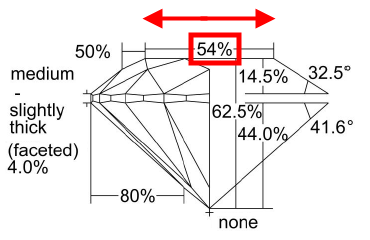

A m√©dia encontrada para o atributo table foi de 57.46, j√° o desvio padr√£o √© de 2.234. A assimetria encontrada 0.797. 

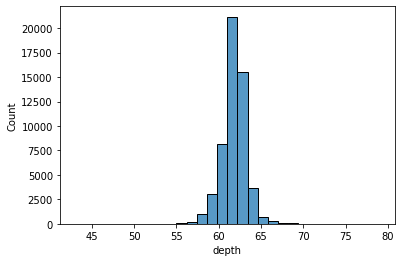

In [ ]:
sns.histplot(data=df, x="depth",bins=30)

**Dimens√µes**

Os atributos de medida ‚Äúx‚Äù, ‚Äúy‚Äù e ‚Äúz‚Äù t√™m m√©dias 5.731, 5734 e 3.54, respectivamente.O atributo de largura tem desvio 1.122, o desvio do comprimento √© 1.142 e de altura √© 0.706. Sobre os coeficientes assim√©tricos s√£o 0.378 para ‚Äúx‚Äù, 2.343 para ‚Äúy‚Äù e 1.522 para ‚Äúz‚Äù

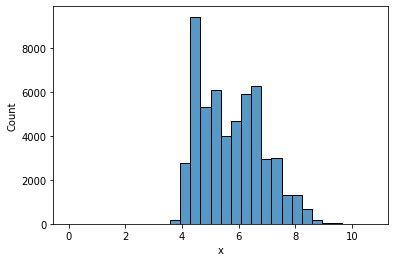

In [ ]:
sns.histplot(data=df, x="x",bins=30)

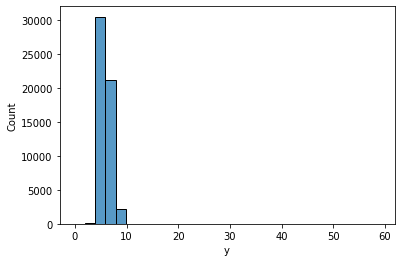

In [ ]:
sns.histplot(data=df, x="y",bins=30)

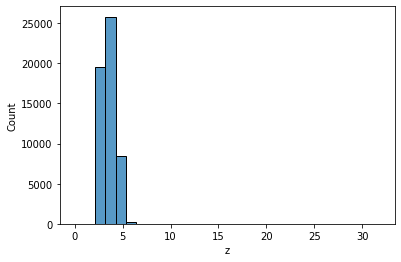

In [ ]:
sns.histplot(data=df, x="z",bins=30)

Analisando as dimens√µes √© poss√≠vel obter o volume das pedras, isso √© feito multiplicando as tr√™s vari√°veis

In [ ]:
df['volume'] = df['x']*df['y']*df['z']


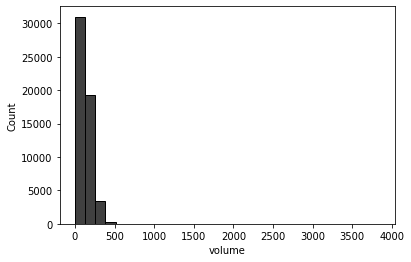

In [ ]:
sns.histplot(data=df, x="volume",bins=30, color= 'black')

Isso permite retiramos os temos x, y e z, permanecendo com o volume

In [ ]:
df.drop(['x','y','z'], axis=1, inplace= True)

In [ ]:
df.describe()

carat         depth         table         price        volume
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000
mean       0.797940     61.749405     57.457184   3932.799722    129.849403
std        0.474011      1.432621      2.234491   3989.439738     78.245262
min        0.200000     43.000000     43.000000    326.000000      0.000000
25%        0.400000     61.000000     56.000000    950.000000     65.136830
50%        0.700000     61.800000     57.000000   2401.000000    114.808572
75%        1.040000     62.500000     59.000000   5324.250000    170.842451
max        5.010000     79.000000     95.000000  18823.000000   3840.598060

In [ ]:
df.skew()

carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

**CATEG√ìRICOS**

**CUT**

Corte do diamante diz respeito a como o diamante foi cortado e lapidado. A lapida√ß√£o consiste em dois par√¢metros muito diferentes: as propor√ß√µes (√¢ngulos e alturas) e o grau de acabamento (simetria e polimento)
A qualidade do corte afeta diretamente a beleza e o brilho do diamante. Um diamante bem cortado √© luminoso e reflete a luz branca e colorida de volta aos seus olhos. Um diamante mal lapidado √© opaco em vez de brilhante.
O corte do diamante s√£o classificados em:

*   Fair
*   Good
*   Very Good
*   Ideal   
*   Premium







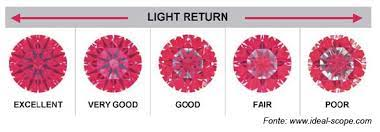

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



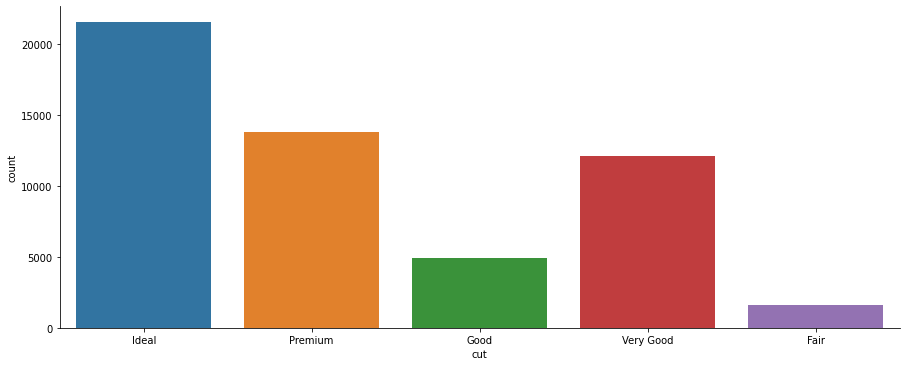

In [ ]:
sns.factorplot(x='cut', data=df , kind='count',aspect=2.5 )

In [ ]:
df_cut = df.groupby(["cut"])


In [ ]:
df_cut.describe()

In [ ]:
df.groupby('cut').hist(figsize = (10,5),bins = 30, color = 'magenta')

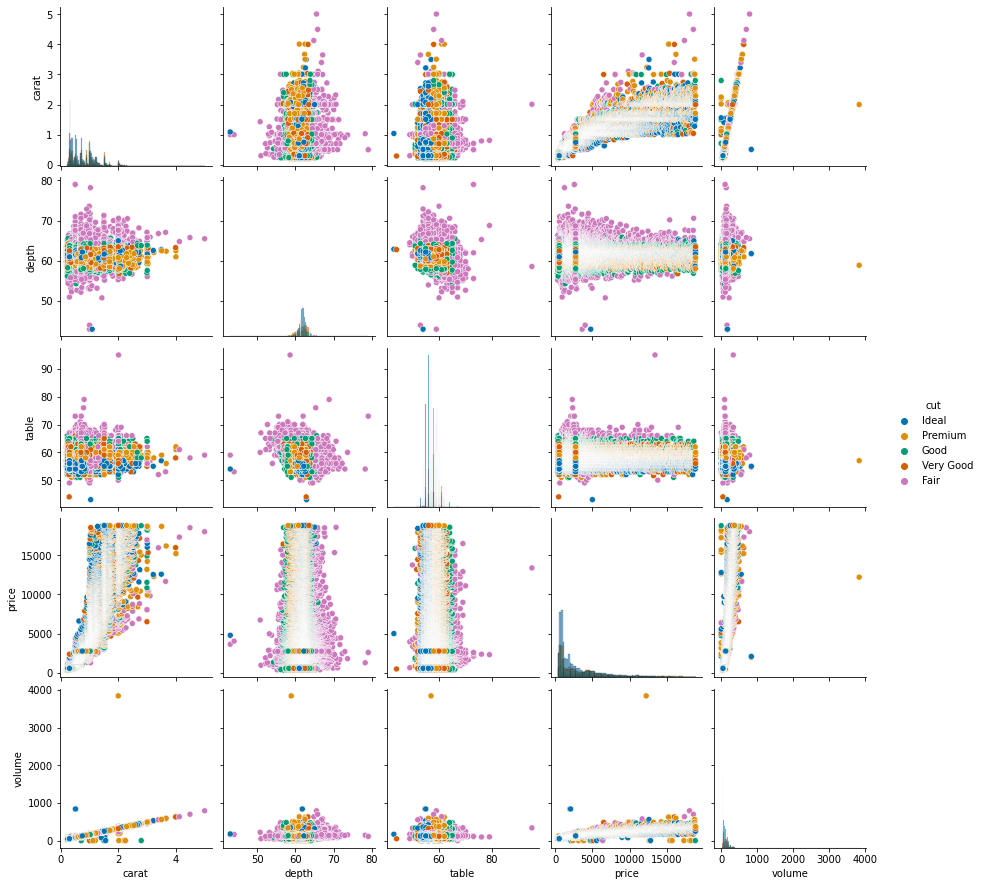

In [ ]:
sns.pairplot(df, hue='cut',palette='colorblind',diag_kind="hist")
plt.show()

**COLOR**

A cor se refere ao tom natural dos diamantes incolores, na natureza a maioria deles tem cor amarelada.
Por isso o GIA criou uma classifica√ß√£o de cores que v√£o de D ao Z, no entanto as amostras foram classificadas apenas do D ao J. Em que quanto mais incolor a pedra for mais alta ela estar√° na escala.
√Ä exce√ß√£o de alguns diamantes coloridos como os vermelhos, o diamante mais valioso no que diz respeito √† cor √© o completamente incolor.

D = Excepcionalmente incolor extra

E = Excepcionalmente incolor

F = Perfeitamente incolor 

G = Nitidamente incolor

H = Incolor

I = Cor levemente percept√≠vel

J = Cor percept√≠vel


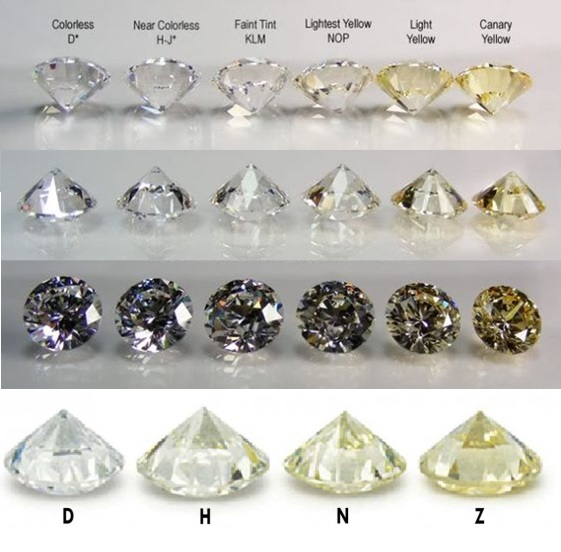

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



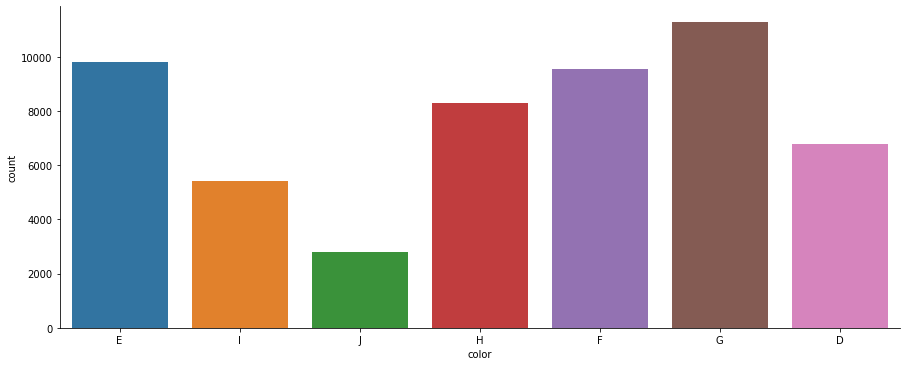

In [ ]:
sns.factorplot(x='color', data=df , kind='count',aspect=2.5 )

In [ ]:
df_color = df.groupby("color")


In [ ]:
df_color.describe()

In [ ]:
df_color.hist(figsize = (10,5),bins = 30, color = 'green')

In [ ]:
sns.pairplot(df, hue='color',palette='colorblind',diag_kind="hist")
plt.show()

**CLARITY**

A pureza est√° relacionada quanto menos fraturas ou outras imperfei√ß√µes e inclus√µes contiver o diamante, melhor √© a sua qualidade tornando-se, desta forma, mais valioso. A exist√™ncia de fraturas ou defeitos internos reduz seus valores em bruto, pois diminui o volume de aproveitamento no processo de lapida√ß√£o.
A quantidade, tamanho, posi√ß√£o e natureza das imperfei√ß√µes (ja√ßa)  definem o grau de pureza do diamante. Um diamante classificado IF ( Internally Flawless - Internamente livre de inclus√µes) √© considerado o mais puro.
Uma pedra √© avaliada como pura se, sob uma amplia√ß√£o de dez vezes, nenhuma inclus√£o (impureza interna) e nenhuma mancha (impureza externa) forem vis√≠veis


A classifica√ß√£o de pureza v√£o do I3 s√£o pe√ßas com grandes inclus√µes e √© o n√≠vel mais baixo, o n√≠vel mais alto √© o FL que √© considerado extremamente puro.
Por√©m as observa√ß√µes apresentadas v√£o do IF, inteiramente livre de inclus√µes, ao I1, esses apresentam inclus√µes evidentes com lupa de 10x.


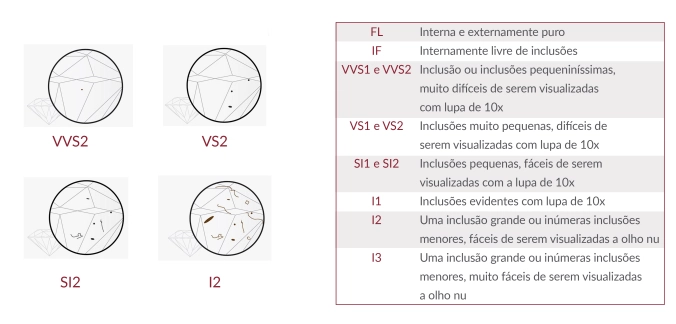

In [ ]:
sns.factorplot(x='clarity', data=df , kind='count',aspect=2.5 )

In [ ]:
df_clarity = df.groupby("clarity")


In [ ]:
df_clarity.describe()

In [ ]:
sns.pairplot(df, hue='clarity',palette='colorblind',diag_kind="hist")
plt.show()

**CORRELA√á√ïES**

Os coeficientes de correla√ß√£o s√£o m√©todos estat√≠sticos para se medir as rela√ß√µes entre vari√°veis e o que elas representam. A correla√ß√£o procura entender como uma vari√°veol se comporta em um cen√°rio em que a outra esta variando, assim √© poss√≠vel entender a rela√ß√£o e variabilidade entre ambas. Desse modo o coeficiente quantifica essa rela√ß√£o, ele pode aparecer positivo ou negativo. 

No caso de o coeficiente ser negativo os dados apresentam correla√ß√£o ineversa, ou seja, s√£o descorrelacionados, enquanto positivo h√° uma rela√ß√£o linear. Esses coeficientes quando possuiem uma proximidade de 1, significa que eles s√£o muito correlacionados, ao passo que se for -1 os dados s√£o bastante descorrelacionados.

Alguns dos preditores apresentavam um coeficiente de correla√ß√£o muito alto, os preditores "carat", "price" e "volume" tem correla√ß√µes muito proximas de 1, isso √© interpret√°vel que com o crescimento do peso e do volume, o pre√ßo ira aumentar e que um volume maior representa um peso maior.

H√° tamb√©m coeficiente negativos √© o caso de "depth" e "table" o coeficiente de -0.3 simboliza que se um cresce o outro decresce, algo parecido ocorre com o "price" e "depth", o coeficiente, apesar de ser bem pr√≥ximo a zero, ele √© negativo, o que ainda representa uma descorrela√ß√£o. 

In [ ]:
corr = df.corr()
corr

carat     depth     table     price    volume
carat   1.000000  0.028224  0.181618  0.921591  0.976308
depth   0.028224  1.000000 -0.295779 -0.010647  0.009157
table   0.181618 -0.295779  1.000000  0.127134  0.167400
price   0.921591 -0.010647  0.127134  1.000000  0.902385
volume  0.976308  0.009157  0.167400  0.902385  1.000000

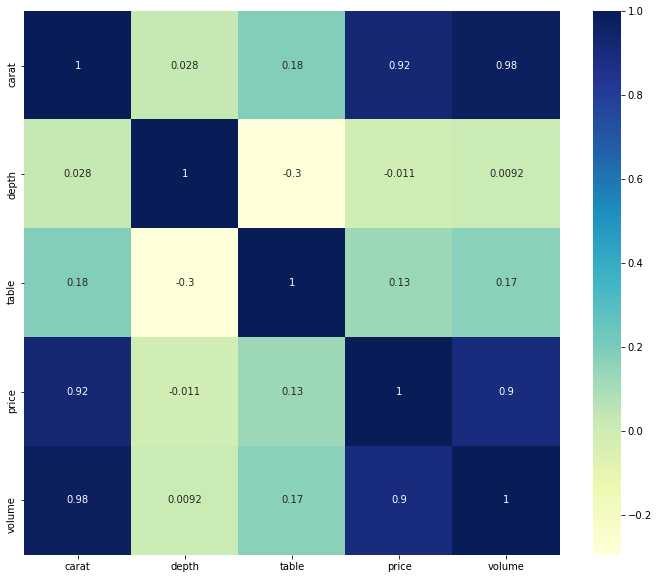

In [ ]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(df.corr(), annot=True,cmap ="YlGnBu")

**OUTLIERS**


Os outliers s√£o dados s√£o dados discrepantes. Esses outliers foram detectados usando a varia√ß√£o interquartis. Assim o IQR √© calculado usando a diferen√ßa entre os quatis maior (0.75) e menor (0.25).

Assim os valores abaixo de Q1‚Äã ‚àí (1,5*IQR) e os valores acima de Q3‚Äã ‚àí (1,5*IQR) s√£o considerados outliers. Esses resultados s√£o facilmente observados com a ajuda dos boxplots.

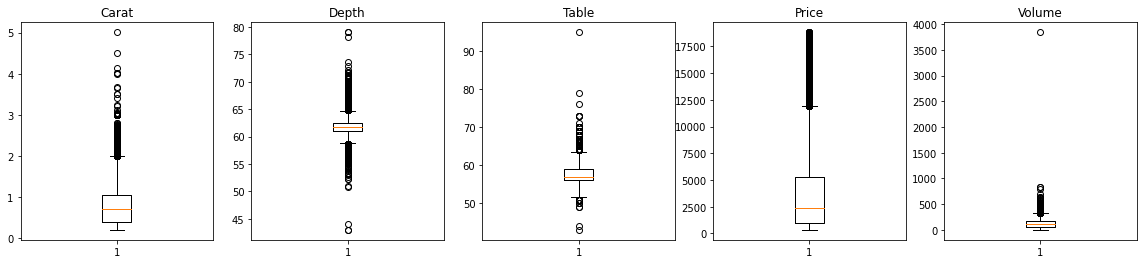

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20,4))
axes[0].boxplot(df['carat'])
axes[0].set_title("Carat")
axes[1].boxplot(df['depth'])
axes[1].set_title("Depth")
axes[2].boxplot(df['table'])
axes[2].set_title("Table")
axes[3].boxplot(df['price'])
axes[3].set_title("Price")
axes[4].boxplot(df['volume'])
axes[4].set_title("Volume")

plt.show()

In [ ]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

carat        0.640000
depth        1.500000
table        3.000000
price     4374.250000
volume     105.705621
dtype: float64

In [ ]:
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

In [ ]:
outliers_iqr= df[outliers.any(1)]
outliers_iqr.count()

carat      6410
cut        6410
color      6410
clarity    6410
depth      6410
table      6410
price      6410
volume     6410
dtype: int64

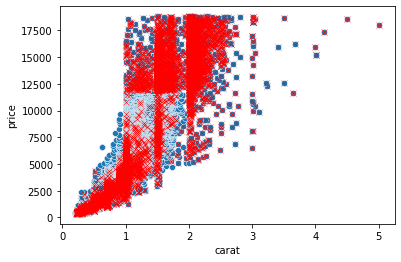

In [ ]:

sns.scatterplot(x='carat', y='price', data=df)
sns.scatterplot(x='carat', y='price', data=outliers_iqr, marker="x",color='red')
plt.show()

In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

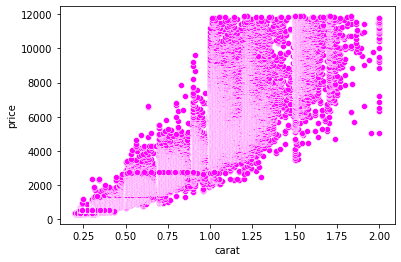

In [ ]:
sns.scatterplot(x = "carat", y = "price", data=df_out,color= "magenta")

**Resultados**

Ao fazer a an√°lise dos dados √© percept√≠vel que alguns dados possu√≠am uma rela√ß√£o linear expressiva, assim preditores de medidas, como os "x", "y" e "z", t√™m forte liga√ß√£o com o peso, coluna "carat". O que faz sentido, j√° que a largura, comprimento e altura juntos formam o volume, se esse volume aumenta e de se esperar que o peso tamb√©m cres√ßa. O que afeta bastante no pre√ßo, diamante como menos quilates apresentam valor menor, comparado aos mais pesados. 

√â importante levar em considera√ß√£o o corte, cor e clareza do diamante e como eles afetam o valor do mesmo. Para o corte temos a m√©dia mais alta do pre√ßo  para os diamantes ‚ÄúPremium‚Äù , mesmo a m√©dia do peso sendo menor, a m√©dia de pre√ßo dos diamantes ‚ÄúFair‚Äù tamb√©m √© alta, mas deve ser levado em considera√ß√£o a quantidade menor de unidades e eles tamb√©m s√£o mais pesados, o que encarece algumas amostras. A correla√ß√£o  de pre√ßo e peso √© menor para os diamantes  com corte de menor qualidade e aumenta √† medida que a qualidade do corte melhora. Assim os de corte "Premium'' s√£o os mais caros seguidos pelos ‚ÄúVery Good ``.

J√°  a clareza, indicando as imperfei√ß√µes, os tipos  ‚ÄúVS1‚Äù e ‚ÄùVS2‚Äù afetam bastante no pre√ßo, j√° que eles apresentam um maior m√°ximo. No entanto, a maior m√©dia s√£o os ‚ÄúSI2‚Äù, os ‚ÄúIF‚Äù, apesar de serem os de n√≠vel mais alto, n√£o √© poss√≠vel notar o quanto isso afeta no pre√ßo. Assim, n√≠veis de clareza afetam o pre√ßo, mas os diamantes de clareza inferior podem ser mais caros que de superior, al√©m do mais, analisando a correla√ß√£o entre pre√ßo e corte a menor √© para os de ‚ÄúIF‚Äù.

A cor dos diamantes com maior n√∫mero de amostras √© tipo ‚ÄúG‚Äù,esse tipo tamb√©m possui maior m√©dia e m√°ximo. Mas os diamantes que t√™m pre√ßos mais elevados s√£o as ‚ÄúI‚Äù e ‚ÄúJ‚Äù, que s√£o as cores consideradas menos adequadas, provavelmente isso ocorre por elas tamb√©m terem maior peso, tendo em vista que a maior correla√ß√£o do pre√ßo com o peso diminui √† medida que a cor melhorava, para o ‚ÄúD‚Äù, considerada ideal, o coeficiente de correla√ß√£o √© de 0,9 e para o ‚ÄúJ‚Äù 0.95, a influ√™ncia da cor parece ser menor.



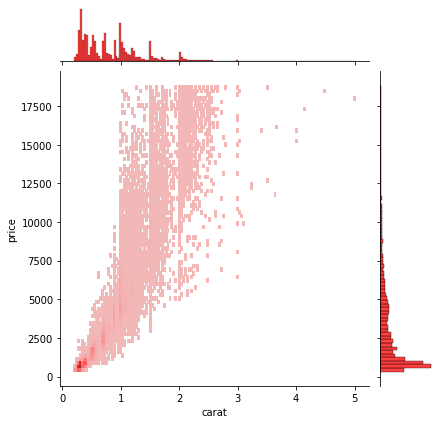

In [ ]:
sns.jointplot(data=df, x="carat", y="price", kind="hist", color='red')

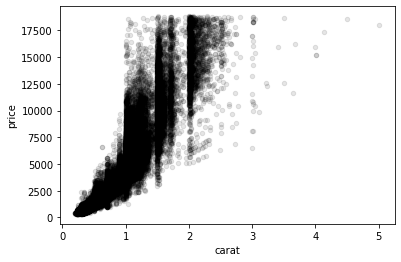

In [ ]:
df.plot(kind="scatter", x="carat", y="price", alpha=0.1, color = 'black')

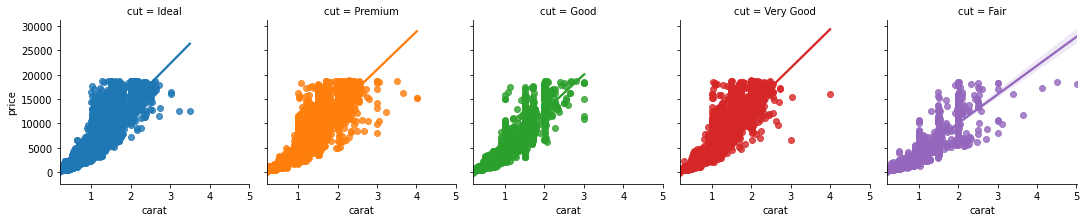

In [ ]:
sns.lmplot(x="carat",y="price",data=df,hue = 'cut',   col="cut",height=3)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


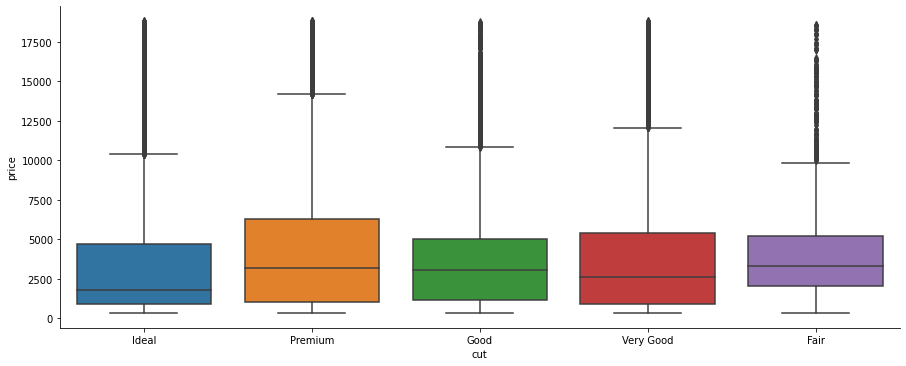

In [ ]:
sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


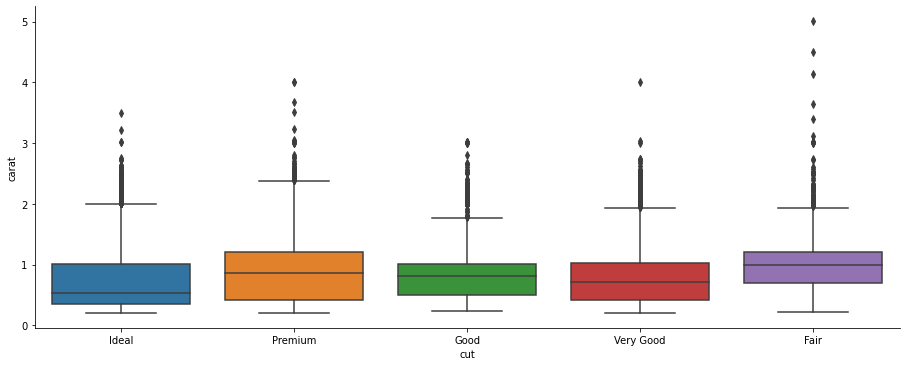

In [ ]:
sns.factorplot(x='cut', y='carat', data=df, kind='box' ,aspect=2.5 )

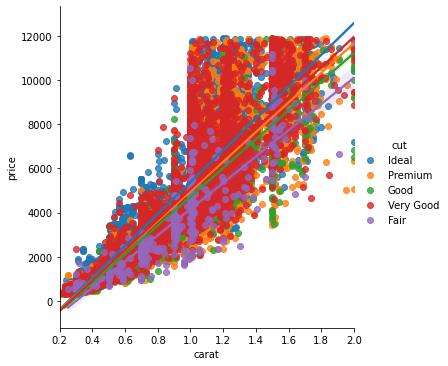

In [ ]:
sns.lmplot(x="carat",y="price",hue = 'cut',  data=df_out)
plt.show()

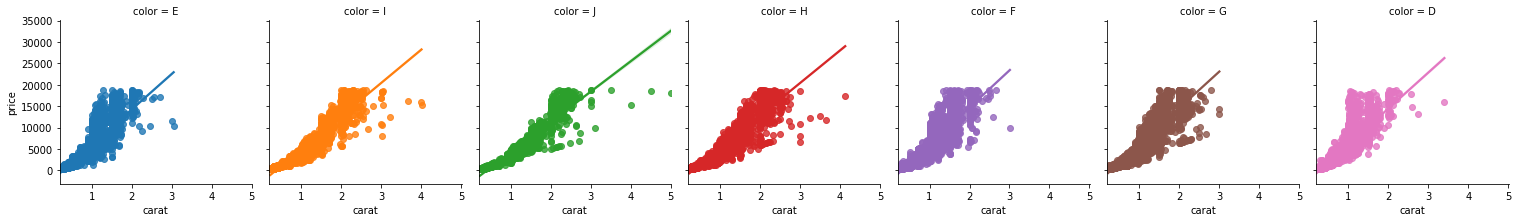

In [ ]:
sns.lmplot(x="carat",y="price",data=df,hue = 'color',   col="color",height=3)
plt.show()

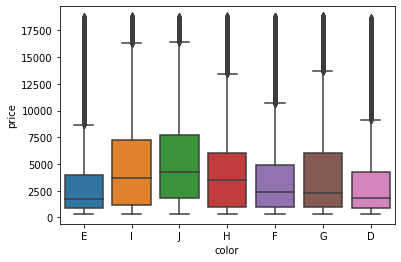

In [ ]:
sns.boxplot(x='color', y='price', data=df )

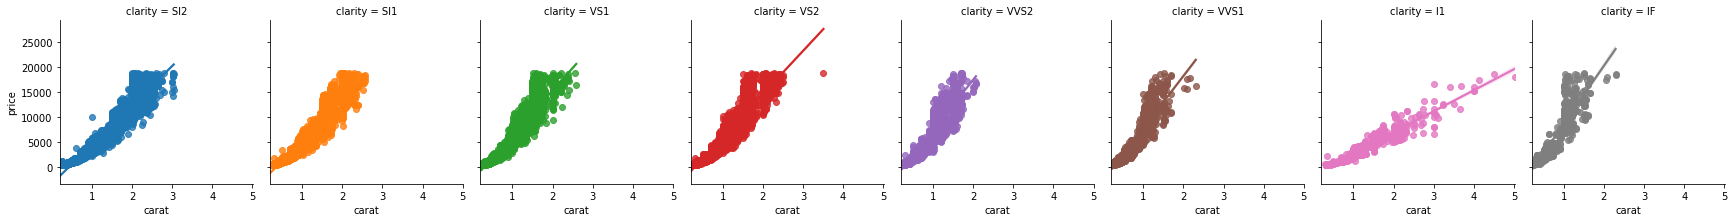

In [ ]:
sns.lmplot(x="carat",y="price",data=df,hue = 'clarity',   col="clarity",height=3)
plt.show()

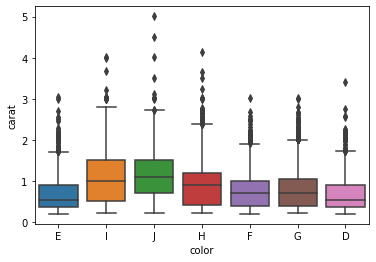

In [ ]:
sns.boxplot(x='color', y='carat', data=df )

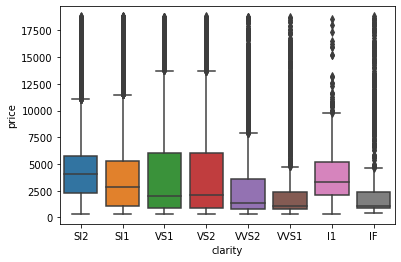

In [ ]:
sns.boxplot(x='clarity', y='price', data=df )

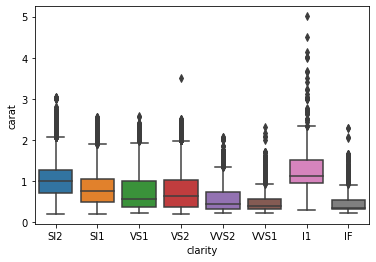

In [ ]:
sns.boxplot(x='clarity', y='carat', data=df )

**Bibliografia**

    
    Livros:
M. Kuhn, K. Johnson. Applied Predictive Modeling, 2014
G. James, D. Witten, T. Hastie and R. Tibshirani, An Introduction to Statistical
Learning with Applications in R2, 2014
Puneet Mathur.Machine Learning Applications Using Python,2019
Leandro de Nunes Castro, Daniel Gomes Ferrari. Introdu√ß√£o √† minera√ß√£o de dados: Conceitos b√°sicos, algoritmos e aplica√ß√µes,2016


In [ ]:
import numpy.linalg as la 
DF =  df.select_dtypes(include=np.number)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
X = DF.drop(['price'], axis=1)
y = DF['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']

In [ ]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


####### Linear Regression #######
Score : 0.8498
[0.86059166 0.85191532 0.84891988 0.84921271 0.85371645]

MSE    : 2425342.70 
MAE    : 1003.59 
RMSE   : 1557.35 
R2     : 0.85 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
